<a href="https://colab.research.google.com/github/muralikandan/aiml-assignment-11/blob/main/prompt_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

**Business Objective**:
*   Goal is to understand what factors make a car more or less expensive.
*   Business Context : Clear recommendation to a used car dealership as to what consumer value in used car.
*   Success Criteria: Identifying features that  influnces car prices and help to increase sales.


**Assess Situation**:

*   Inventory resources : Dataset contained information on 426k used cars
*   Identify constraints: Potential all details not available, different data..etc





### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

This Notebook will cover the following:

*   Loading & Understanding the data
*   Data cleaning
*   Exploratory Data Analysis
*   Data Modelling and evaluation
*   Conclusion



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Read data from CSV
vehicle_df = pd.read_csv('sample_data/vehicles.csv')
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [3]:
vehicle_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
vehicle_df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [5]:
vehicle_df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [6]:
vehicle_df.title_status.value_counts()

clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: title_status, dtype: int64

In [7]:
vehicle_df.cylinders.value_counts()

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

In [8]:
vehicle_df.transmission.value_counts()

automatic    336524
other         62682
manual        25118
Name: transmission, dtype: int64

In [9]:
vehicle_df.model.value_counts()


f-150                      8009
silverado 1500             5140
1500                       4211
camry                      3135
silverado                  3023
                           ... 
plymouth fury 1               1
f550 box truck delivery       1
duramax 2500hd                1
3 s sport                     1
Paige Glenbrook Touring       1
Name: model, Length: 29649, dtype: int64

In [10]:
vehicle_df['size'].value_counts()

full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: size, dtype: int64

In [11]:
vehicle_df.odometer.value_counts()

100000.0    2263
1.0         2246
0.0         1965
200000.0    1728
150000.0    1603
            ... 
149468.0       1
154259.0       1
111887.0       1
213826.0       1
26892.0        1
Name: odometer, Length: 104870, dtype: int64

In [12]:
vehicle_df.fuel.value_counts()

gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: fuel, dtype: int64

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [13]:
#To Identify column wise null values count
vehicle_df.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

Skewness: 254.406932
Kurtosis: 69205.088590


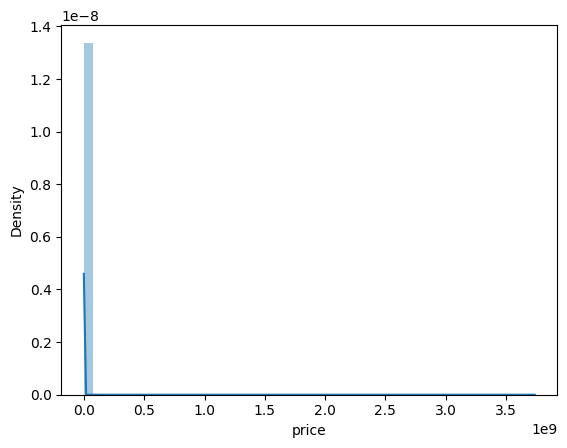

In [14]:
#Analyze Price column with box plot
sns.distplot(vehicle_df['price'])

print("Skewness: %f" % vehicle_df['price'].skew())
print("Kurtosis: %f" % vehicle_df['price'].kurt())

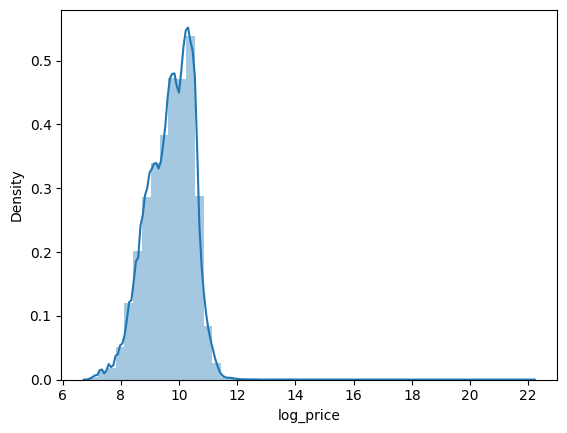

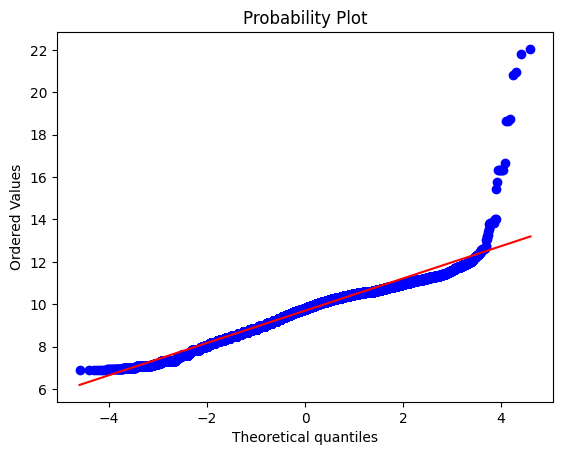

In [15]:
#Considering leaving out 20+year old car and some price outliers (like $0 to $1000 as price can't be as low ) - check histogram and normal probability plot
# Dropping rows with price column as 0 or 1
vehicle_filtered = vehicle_df.query('year > 2004 and price > 1000')
#applying log transformation
vehicle_filtered ['log_price'] = np.log(vehicle_filtered['price'])

sns.distplot(vehicle_filtered['log_price'], fit=None);
fig = plt.figure()
res = stats.probplot(vehicle_filtered['log_price'], plot=plt)


**RELATIONSHIP OF PRICE WITH OTHER PARAMETER**

In [16]:
vehicle_filtered ['log_odometer'] = np.log(vehicle_filtered['odometer'])

In [17]:
# Considering significance of column and column with maximum null, dropping those column make sense
vehicle_filtered = vehicle_filtered.drop(columns= ['id','VIN','region','state'])

In [18]:
vehicle_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327075 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         327075 non-null  int64  
 1   year          327075 non-null  float64
 2   manufacturer  317737 non-null  object 
 3   model         324683 non-null  object 
 4   condition     200177 non-null  object 
 5   cylinders     187424 non-null  object 
 6   fuel          324891 non-null  object 
 7   odometer      325219 non-null  float64
 8   title_status  321262 non-null  object 
 9   transmission  325427 non-null  object 
 10  drive         228011 non-null  object 
 11  size          85427 non-null   object 
 12  type          263455 non-null  object 
 13  paint_color   235640 non-null  object 
 14  log_price     327075 non-null  float64
 15  log_odometer  325219 non-null  float64
dtypes: float64(4), int64(1), object(11)
memory usage: 42.4+ MB


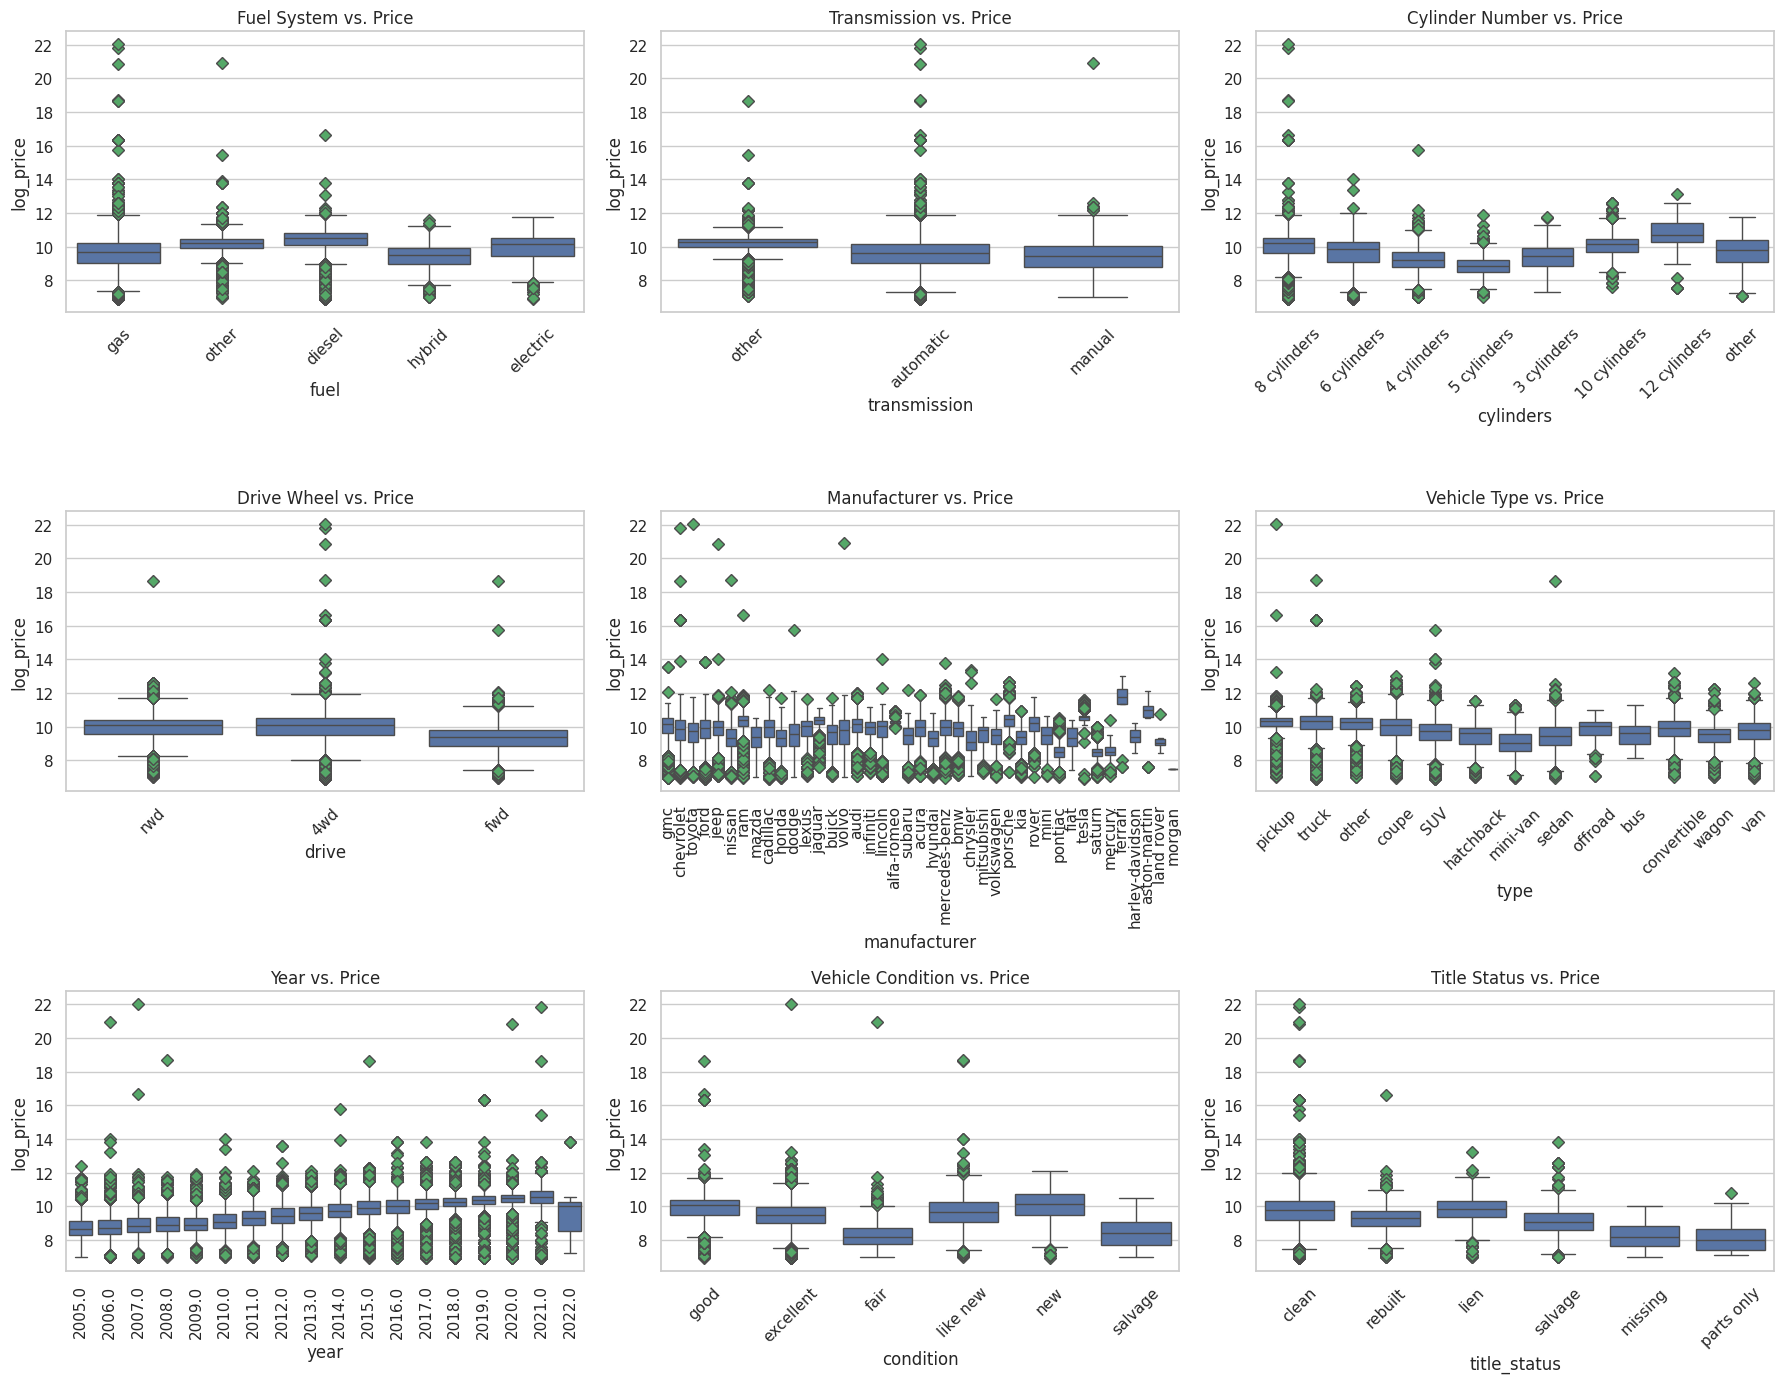

In [19]:
green_diamond = dict(markerfacecolor='g', marker='D')

# Set the style for the plots
sns.set(style="whitegrid")

# Create a catplot with subplots for each categorical variable
plt.figure(figsize=(18, 14))
order = None

# Create subplots for each categorical variable
plt.subplot(3, 3, 1)
sns.boxplot(y='log_price', x='fuel', data=vehicle_filtered,
            flierprops=green_diamond, order=order)
plt.xticks(rotation=45)
plt.title('Fuel System vs. Price')

plt.subplot(3, 3, 2)
sns.boxplot(y='log_price', x='transmission',data=vehicle_filtered,
            flierprops=green_diamond, order=order)
plt.xticks(rotation=45)
plt.title('Transmission vs. Price')

plt.subplot(3, 3, 3)
sns.boxplot(y='log_price', x='cylinders', data=vehicle_filtered,
            flierprops=green_diamond, order=order)
plt.xticks(rotation=45)
plt.title('Cylinder Number vs. Price')

plt.subplot(3, 3, 4)
sns.boxplot(y='log_price', x='drive', data=vehicle_filtered,
            flierprops=green_diamond, order=order)
plt.xticks(rotation=45)
plt.title('Drive Wheel vs. Price')

plt.subplot(3, 3, 5)
sns.boxplot(y='log_price', x='manufacturer', data=vehicle_filtered,
            flierprops=green_diamond, order=order)
plt.xticks(rotation=90)
plt.title('Manufacturer vs. Price')

plt.subplot(3, 3, 6)
sns.boxplot(y='log_price', x='type', data=vehicle_filtered,
            flierprops=green_diamond, order=order)
plt.xticks(rotation=45)
plt.title('Vehicle Type vs. Price')

plt.subplot(3, 3, 7)
sns.boxplot(y='log_price', x='year', data=vehicle_filtered,
            flierprops=green_diamond, order=order)
plt.xticks(rotation=90)
plt.title('Year vs. Price')

plt.subplot(3, 3, 8)
sns.boxplot(y='log_price', x='condition', data=vehicle_filtered,
            flierprops=green_diamond, order=order)
plt.xticks(rotation=45)
plt.title('Vehicle Condition vs. Price')

plt.subplot(3, 3, 9)
sns.boxplot(y='log_price', x='title_status', data=vehicle_filtered,
            flierprops=green_diamond, order=order)
plt.xticks(rotation=45)
plt.title('Title Status vs. Price')

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

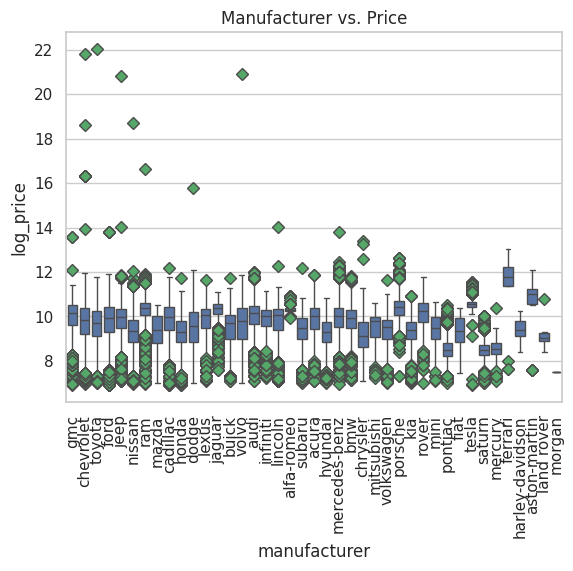

In [20]:
sns.boxplot(y='log_price', x='manufacturer', data=vehicle_filtered,
            flierprops=green_diamond)
plt.xticks(rotation=90)
plt.title('Manufacturer vs. Price')
plt.show

Consider below points to filter further based on year & price.
Check years impact in vehicle price by considering vechicles not more than

*   Vehicles not more than 20 years old
*   Vehicle price as low as 1000$, as campaign happened for price 500


Text(0.5, 1.0, 'Year vs. Price')

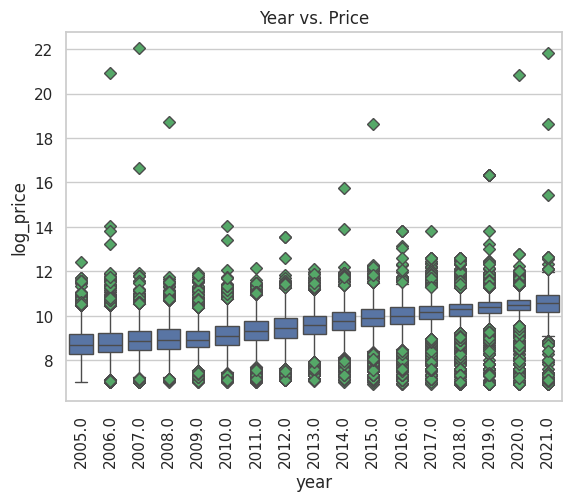

In [36]:
sns.boxplot(y='log_price', x='year',
            data=vehicle_filtered.query(' 2004 < year <2022 and price > 1000'),
            flierprops=green_diamond)
plt.xticks(rotation=90)
plt.title('Year vs. Price')

Capturing  vehicle cylinder count impact to price, boxplot analysis to show in graph.

*  Boxplot analysis to show impact to price
*  Though 60% of cylinder data is NAN but analysis needed with available data
*   Applied dummies approach with available cylinder data to price to year


Text(0.5, 1.0, 'Cylinder Number vs. Price')

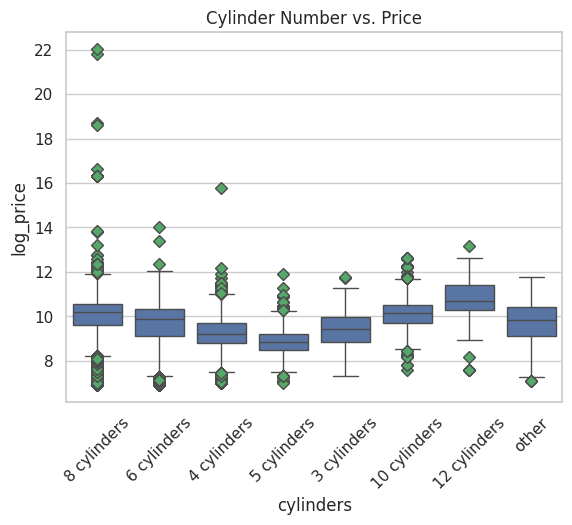

In [21]:
sns.boxplot(y='log_price', x='cylinders', data=vehicle_filtered,
            flierprops=green_diamond, order=order)
plt.xticks(rotation=45)
plt.title('Cylinder Number vs. Price')

In [29]:
vehicle_cylinder_df = vehicle_filtered[['log_price','cylinders','year','odometer']]

In [30]:
vehicle_cylinder_df = vehicle_cylinder_df.dropna()

In [31]:
vehicle_cylinder_df=pd.get_dummies(vehicle_cylinder_df, columns=['cylinders'], drop_first=True)
vehicle_cylinder_df.head()

,log_price,year,odometer,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other
27,10.421984,2014.0,57923.0,0,0,0,0,0,1,0
28,10.025263,2010.0,71229.0,0,0,0,0,0,1,0
29,10.586332,2020.0,19160.0,0,0,0,0,0,1,0
30,10.341420,2017.0,41124.0,0,0,0,0,0,1,0
31,9.615805,2013.0,128000.0,0,0,0,0,1,0,0


In [ ]:
corr_cylinder_matrix = vehicle_cylinder_df.corr()
corr_cylinder_matrix

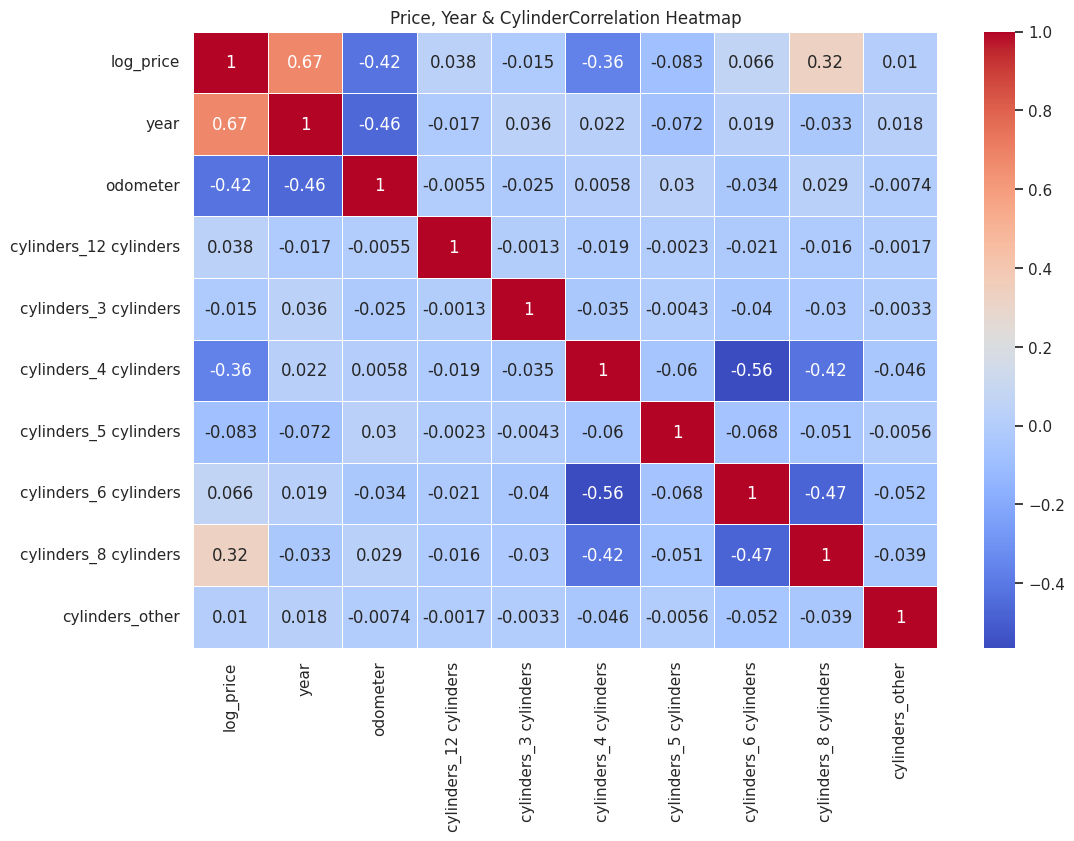

In [35]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_cylinder_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Price, Year & CylinderCorrelation Heatmap')
plt.show()

**Positive Correlation with Price**: Making Year and 8-cylinder vehicles show a strong positive correlation with the target variable (price). As these variables increase, the car price tends to increase as well.

At the sametime 6-cylinder & 12-cylinders feature show somelevel of positive impact to price.  

**Negative Correlation with Price**: Conversely, the features odometer reading and4-cylinders  has direct & high negative impact to price.

**Price Distribution & Inference :**
After data analysis, box plot &  outlier study align to below approach

*   Converting the value of Price to Log(Price) & price value more than $1000
*   Consider vehicles since year 2000, prior to that should consider is antique
This resulted in more normal distribution of price and but cleaner probability plot as well. Probability plot still has some upward curvature which suggests that the data has heavier tails than the theoritical distribution.

In [36]:
vehicle_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327075 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         327075 non-null  int64  
 1   year          327075 non-null  float64
 2   manufacturer  317737 non-null  object 
 3   model         324683 non-null  object 
 4   condition     200177 non-null  object 
 5   cylinders     187424 non-null  object 
 6   fuel          324891 non-null  object 
 7   odometer      325219 non-null  float64
 8   title_status  321262 non-null  object 
 9   transmission  325427 non-null  object 
 10  drive         228011 non-null  object 
 11  size          85427 non-null   object 
 12  type          263455 non-null  object 
 13  paint_color   235640 non-null  object 
 14  log_price     327075 non-null  float64
 15  log_odometer  325219 non-null  float64
dtypes: float64(4), int64(1), object(11)
memory usage: 42.4+ MB


In [37]:
#Drop size column which has 75% null value
vehicle_filtered = vehicle_filtered.drop(columns= ['size'])

In [38]:
vehicle_filtered.isna().sum()

price                0
year                 0
manufacturer      9338
model             2392
condition       126898
cylinders       139651
fuel              2184
odometer          1856
title_status      5813
transmission      1648
drive            99064
type             63620
paint_color      91435
log_price            0
log_odometer      1856
dtype: int64

In [39]:
vehicle_filtered.count()

price           327075
year            327075
manufacturer    317737
model           324683
condition       200177
cylinders       187424
fuel            324891
odometer        325219
title_status    321262
transmission    325427
drive           228011
type            263455
paint_color     235640
log_price       327075
log_odometer    325219
dtype: int64

In [40]:
vehicle_filtered_encoded = vehicle_filtered[['log_price','log_odometer','fuel','transmission','title_status','year']]

In [41]:
vehicle_filtered_encoded = vehicle_filtered_encoded.dropna()

In [42]:
#categorical_columns = ['symboling', 'fueltype', 'aspiration', 'drivewheel', 'carbody', 'cylindernumber',
#                       'enginetype', 'enginelocation', 'class']
categorical_columns = ['fuel','transmission','title_status']
# Perform one-hot encoding for the categorical columns
vehicle_filtered_encoded = pd.get_dummies(vehicle_filtered_encoded, columns=categorical_columns, drop_first=True)

vehicle_filtered_encoded.head()

,log_price,log_odometer,year,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,transmission_manual,transmission_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage
27,10.421984,10.966870,2014.0,0,1,0,0,0,1,0,0,0,0,0
28,10.025263,11.173655,2010.0,0,1,0,0,0,1,0,0,0,0,0
29,10.586332,9.860580,2020.0,0,1,0,0,0,1,0,0,0,0,0
30,10.341420,10.624347,2017.0,0,1,0,0,0,1,0,0,0,0,0
31,9.615805,11.759786,2013.0,0,1,0,0,0,0,0,0,0,0,0


In [43]:
vehicle_filtered_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316769 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   log_price                316769 non-null  float64
 1   log_odometer             316769 non-null  float64
 2   year                     316769 non-null  float64
 3   fuel_electric            316769 non-null  uint8  
 4   fuel_gas                 316769 non-null  uint8  
 5   fuel_hybrid              316769 non-null  uint8  
 6   fuel_other               316769 non-null  uint8  
 7   transmission_manual      316769 non-null  uint8  
 8   transmission_other       316769 non-null  uint8  
 9   title_status_lien        316769 non-null  uint8  
 10  title_status_missing     316769 non-null  uint8  
 11  title_status_parts only  316769 non-null  uint8  
 12  title_status_rebuilt     316769 non-null  uint8  
 13  title_status_salvage     316769 non-null  uint8  
dtypes: 

In [44]:
vehicle_filtered_encoded.reset_index()

,index,log_price,log_odometer,year,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,transmission_manual,transmission_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage
0,27,10.421984,10.966870,2014.0,0,1,0,0,0,1,0,0,0,0,0
1,28,10.025263,11.173655,2010.0,0,1,0,0,0,1,0,0,0,0,0
2,29,10.586332,9.860580,2020.0,0,1,0,0,0,1,0,0,0,0,0
3,30,10.341420,10.624347,2017.0,0,1,0,0,0,1,0,0,0,0,0
4,31,9.615805,11.759786,2013.0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316764,426875,10.068578,10.380529,2019.0,0,1,0,0,0,1,0,0,0,0,0
316765,426876,10.328428,9.395076,2020.0,0,1,0,0,0,1,0,0,0,0,0
316766,426877,10.462818,8.336630,2020.0,0,0,0,0,0,1,0,0,0,0,0
316767,426878,10.274706,10.312679,2018.0,0,1,0,0,0,1,0,0,0,0,0


In [45]:
#remove all infinity value
vehicle_filtered_encoded = vehicle_filtered_encoded[~vehicle_filtered_encoded['log_odometer'].isin([np.inf,-np.inf])]

In [46]:
vehicle_filtered_encoded[vehicle_filtered_encoded['log_odometer'].isin([np.inf,-np.inf])]

,log_price,log_odometer,year,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,transmission_manual,transmission_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

target_variable = 'log_price'

X = vehicle_filtered_encoded.drop(target_variable, axis=1)
y = vehicle_filtered_encoded[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (221409, 13)
X_test shape: (94890, 13)
y_train shape: (221409,)
y_test shape: (94890,)


Considered applying multiple regression models - Linear, Ridge & Lasso. With paramterized combination of gridsearch to get best model. Used code  from [kaggle](https://www.kaggle.com/code/yaminh/price-prediction-rf-with-94-r-squared)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Consider models - Linear, Ridge & Lasso
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Define evaluation metrics
metrics = {
    'MSE': make_scorer(mean_squared_error),
    'R-squared': make_scorer(r2_score),
}



In [51]:
from sklearn.model_selection import GridSearchCV

# Create an empty list to store individual DataFrames
dfs = []

# Iterate through the models and perform hyperparameter tuning
for model_name, model in models.items():
    param_grid = {}  # Define hyperparameters to tune for each model
    if model_name == 'Ridge Regression':
        param_grid = {'alpha': [0.01, 0.1, 1, 10]}
    elif model_name == 'Lasso Regression':
        param_grid = {'alpha': [0.01, 0.1, 1, 10]}

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    #importances = best_model.feature_importances_

    # Create a DataFrame for the current model results
    model_df = pd.DataFrame({'Model': model_name, 'MSE': mse, 'R-squared': r_squared,'Best_model': best_model}, index=[0])
    dfs.append(model_df)

# Concatenate all individual DataFrames into one
results_df = pd.concat(dfs, ignore_index=True)

results_df

,Model,MSE,R-squared,Best_model
0,Linear Regression,0.265958,0.554089,LinearRegression()
1,Ridge Regression,0.265958,0.554089,Ridge(alpha=0.01)
2,Lasso Regression,0.293158,0.508485,Lasso(alpha=0.01)


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [57]:
from sklearn.model_selection import cross_val_score

# List to store individual DataFrames
dfs = []

# Iterate through the models and evaluate them
for model_name, model in models.items():
    mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=metrics['MSE'])
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=metrics['R-squared'])
    # Create a DataFrame for the current model evaluation
    model_df = pd.DataFrame({
        'Model': model_name,
        'MSE': mse_scores.mean(),
        'R-squared': r2_scores.mean()
    }, index=[0])  # Make sure to set index to [0] to ensure proper concatenation
    dfs.append(model_df)

# Concatenate all individual DataFrames into one
results_df = pd.concat(dfs, ignore_index=True)

# Display the results DataFrame
print(results_df)

               Model       MSE  R-squared
0  Linear Regression  0.265657   0.553543
1   Ridge Regression  0.265658   0.553542
2   Lasso Regression  0.377565   0.365471


Lowest MSE (Mean Squared Error):
Linear regression and Ridge regression has lower mean squared error when compared to Lasso, indicating better predictive performance. Incase ridge regression alpha=0.01, performing better than other paramters.

Highest R-squared (R^2):
Linear regression and Ridge regression has the highest R-squared, which means it explains the most variance in the target variable. Incase ridge regression alpha=0.01, performing better than other paramters.

In [58]:
encoded_correlation_matrix = vehicle_filtered_encoded.corr()

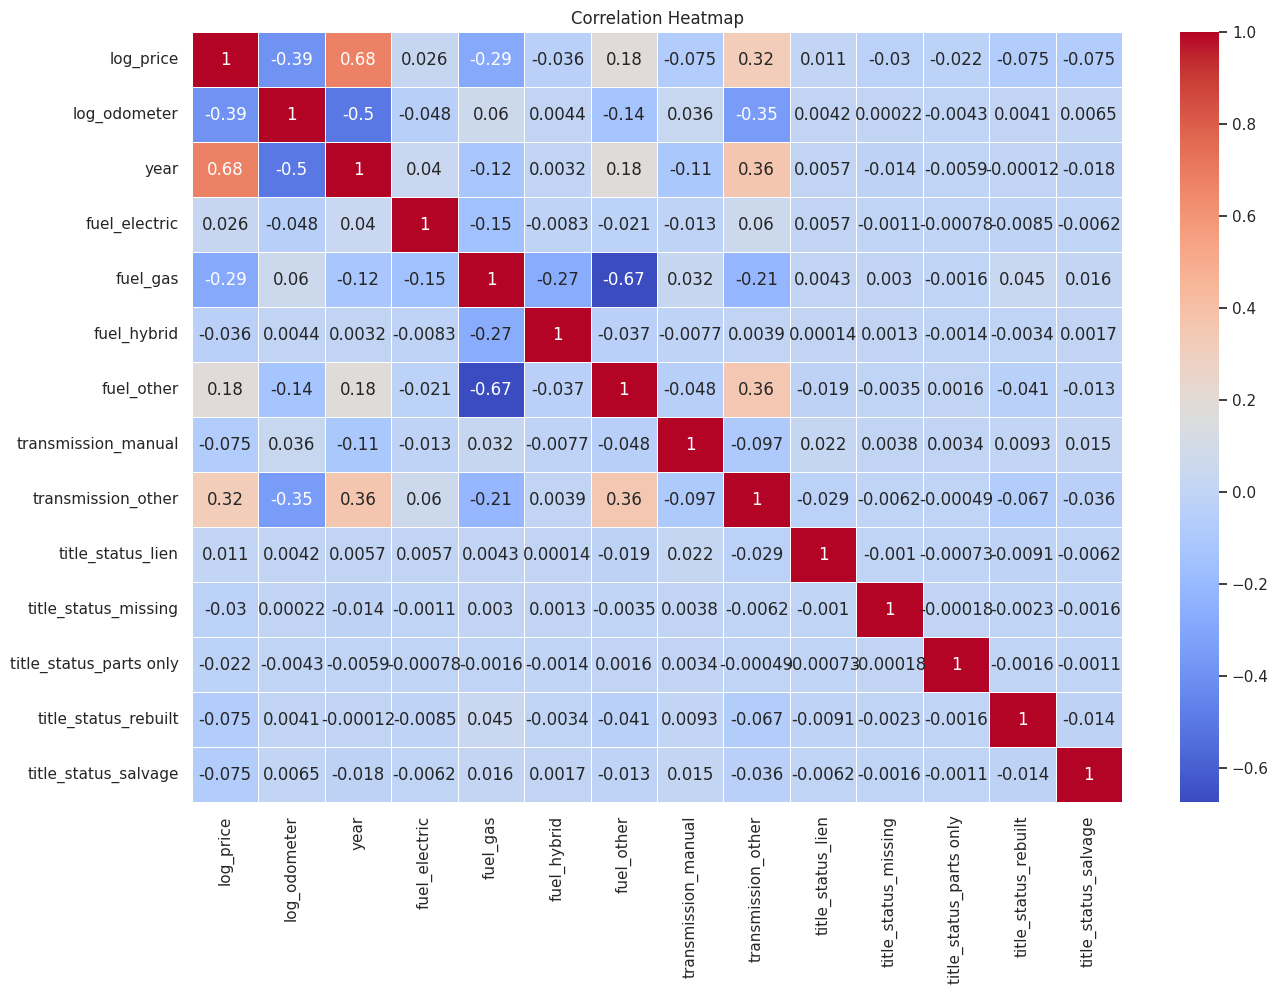

In [59]:
# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(encoded_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Positive Correlation with Price**:
Making Year and transmission type show a strong positive correlation with the target variable (price). As these variables increase, the car price tends to increase as well. This suggests that these attributes significantly influence the pricing of cars in the dataset.

At the sametime features fuel type and good title status has medium to low impact positive impact to used car price.


**Negative Correlation with Price:**
Conversely, the feature odometer reading has direct & high negative impact to price. Particular features like gas-fuel vehicle, salvage title vehicle has medium to low negative impact to price.


In [60]:
vehicle_filtered_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316299 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   log_price                316299 non-null  float64
 1   log_odometer             316299 non-null  float64
 2   year                     316299 non-null  float64
 3   fuel_electric            316299 non-null  uint8  
 4   fuel_gas                 316299 non-null  uint8  
 5   fuel_hybrid              316299 non-null  uint8  
 6   fuel_other               316299 non-null  uint8  
 7   transmission_manual      316299 non-null  uint8  
 8   transmission_other       316299 non-null  uint8  
 9   title_status_lien        316299 non-null  uint8  
 10  title_status_missing     316299 non-null  uint8  
 11  title_status_parts only  316299 non-null  uint8  
 12  title_status_rebuilt     316299 non-null  uint8  
 13  title_status_salvage     316299 non-null  uint8  
dtypes: 

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

**Optimizing inventory mix for increased sales and customer satisfaction**

After conducting a comprehensive analysis of car data, we have identified several key insights that can guide the dealershop in optimizing its inventory mix to maxmize sales and enhance customer satisfaction

1.  Adapting to Market Trends:
Keep abreast of current market trends is crucial for maintaning a competitive edge. Recent data suggests a surge in price for recent years vehicles and less driven/used vehicles and even luxury/premium vehicles perform well.  By aligning inventory with these trends, the dealership can capitalize on emerging opportunities and attract a broader range of customier.
2.   Optimizing Inventory Mix:
Based on our analysis, we recommend adjusting the dealership's inventory mix to relfect the evolving preference of customer and market dynamics. This entails:

> Expanding the selection of car with features such as eletric vehicles, more cylinder vehicles, rear & 4WD vehicles, high demand vehicle-type.. has major contribution to various segment of buyers.

> Rationalizing inventory of less popular models or segments to free up resources and allocate them towards high-demand  / high-end (Ferrari, Audi, BMW, Jaguar, RAM..etc),  vehicle with greater sales potentials .

In conclusion, by strategically adjusting its inventory mix to align with customer preference and market trends, the dealership can position itself for success in a comptetitive automotive landscape. Continously monitoring and ansalysing sales data vs inventory will be essential to adapt to changing dynamics and maintain a thriving business model.